In [1]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.text import text_to_word_sequence
import re
from nltk.util import ngrams
import numpy as np
from tensorflow.python.keras.utils import to_categorical
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Flatten, Activation, Embedding, Dense, LSTM, Bidirectional
import pandas as pd
import os

def encode(data):
    encoded = to_categorical(data, num_classes = len(vocab))
    return encoded

data=pd.read_csv(r"C:\Users\nasim\Downloads\news_summary.csv", encoding ="ISO-8859-1" )

data.head()

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [ ]:
data.isnull().sum()

In [ ]:
data = data.dropna()
data = data.drop(['author','date','headlines','read_more','ctext'], 1)
data = data.reset_index(drop=True)

In [ ]:
data.head()

In [ ]:
data.isnull().sum()

In [ ]:
print(len(data))

In [2]:
text=""
for x in range(0,100):
    text=text+" "+data.text[x]

In [3]:
anot=text
text=re.sub(r"[^a-zA-Z0-9. ]+", '', text)
text=text.split('. ')
tokenizer=Tokenizer()
tokenizer.fit_on_texts(text)
sents=tokenizer.texts_to_sequences(text)
#print(sents)
abar=text_to_word_sequence(anot)

vocab=set(abar)
#print('Unique words in the vocabulary: ',vocab)

print('Length of the vocabulary: ',len(vocab))

Length of the vocabulary:  2145


In [4]:
bigline=0;

for j in range(0,len(sents)):
    if(len(sents[j])>bigline):
        bigline=len(sents[j])
        
print('Length of the biggest line is: ',bigline)

Length of the biggest line is:  47


In [5]:
dum5=[]
dum6=[]

for k in range(0,len(sents)):
    dum1=[]
    dum3=[]
    for i in range(2,len(sents[k])+1):
        ngs=list(ngrams(sents[k], i))
        dum1.append(ngs[0])
    
    pads=pad_sequences(dum1,maxlen=bigline,value=0,padding='pre')
    #print('Padding of corresponding n-grams:')
    #print(pads)
    
    #print(dum1)
    
    dum2=(dum1[len(sents[k])-2])
    for l in range(1,len(dum2)):
        dum3.append(dum2[l])
    
    #print(dum2)
    labels=np.array(dum3)
    #print('Labels: ',labels)
    print('List:', list(labels))
    
    print('One Hot Encoding representation:')
    one_hot = encode(labels)
    print(one_hot)
    
    
    for u in range(0,len(sents[k])-1):
        dum4=np.delete(pads[u],bigline-1)
        dum5.append(list(dum4))
        dum6.append(list(one_hot[u]))

    fet=np.array(dum5)
    lev=np.array(dum6)

List: [155, 3, 227, 374, 375, 5, 376, 11, 740, 27, 377, 10, 156, 15, 157, 8, 75, 4, 378, 379, 4, 51, 228, 380, 7, 1, 741, 3, 229, 7, 89, 230]
One Hot Encoding representation:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
List: [155, 13, 381, 4, 742, 1, 231, 232, 382, 233, 3, 743, 1, 234, 24, 15, 235, 744, 20, 158, 5, 13, 236, 7, 237, 238]
One Hot Encoding representation:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
List: [745, 236, 22, 384, 385, 35, 159, 30, 8, 746, 2, 747, 58, 5, 748, 749, 18, 1, 750]
One Hot Encoding representation:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
List: [115, 116, 12, 76, 38, 239, 386, 751, 752, 4, 753, 160, 754, 755, 756, 1, 38

In [6]:
model = Sequential()
model.add(Embedding(len(vocab), 100, input_length=bigline-1))

In [7]:
model.add(LSTM(100, return_sequences=True))

In [8]:
model.add(Bidirectional(LSTM(100)))

In [9]:
model.add(Flatten())

In [10]:
model.add((Dense(len(vocab),activation='softmax')))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(fet,lev,epochs=200)

Train on 5572 samples
Epoch 1/200
5572/5572 [==============================] - 34s 6ms/sample - loss: 7.0997 - accuracy: 0.0479
Epoch 2/200
5572/5572 [==============================] - 29s 5ms/sample - loss: 6.6306 - accuracy: 0.0490
Epoch 3/200
5572/5572 [==============================] - 30s 5ms/sample - loss: 6.4215 - accuracy: 0.0492
Epoch 4/200
5572/5572 [==============================] - 31s 5ms/sample - loss: 6.2585 - accuracy: 0.0551
Epoch 5/200
5572/5572 [==============================] - 31s 6ms/sample - loss: 6.1389 - accuracy: 0.0558
Epoch 6/200
5572/5572 [==============================] - 32s 6ms/sample - loss: 6.0366 - accuracy: 0.0605
Epoch 7/200
5572/5572 [==============================] - 32s 6ms/sample - loss: 5.9274 - accuracy: 0.0639
Epoch 8/200
5572/5572 [==============================] - 31s 6ms/sample - loss: 5.8145 - accuracy: 0.0675
Epoch 9/200
5572/5572 [==============================] - 31s 6ms/sample - loss: 5.6910 - accuracy: 0.0734
Epoch 10/200
5572/5572 [

Text(0, 0.5, 'accuracy')

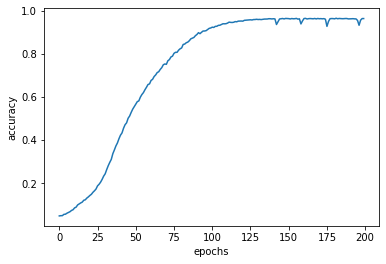

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

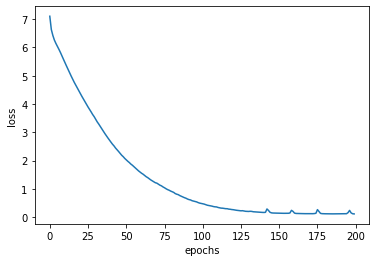

In [14]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

In [26]:
nam = "KUET is situated"
nam=nam.split('. ')
#type(nam)
#print(type(nam[0]))

In [27]:
for it in range(0,20):
    print(nam[0])
    nam1=nam[0]
    nam1=nam1.split('. ')
    tokenizer=Tokenizer()
    tokenizer.fit_on_texts(nam1)
    namsen =tokenizer.texts_to_sequences(nam1)
    print(namsen)
    npad=pad_sequences(namsen,maxlen=bigline-1,value=0,padding='pre')
    newpre = model.predict_classes(npad,verbose=0)[0]
    nwwrd=abar[newpre]
    
    print(nwwrd)
    
    nam[0]+=' '+nwwrd

KUET is situated
[[1, 2, 3]]
get
KUET is situated get
[[1, 2, 3, 4]]
nota
KUET is situated get nota
[[1, 2, 3, 4, 5]]
been
KUET is situated get nota been
[[1, 2, 3, 4, 5, 6]]
circular
KUET is situated get nota been circular
[[1, 2, 3, 4, 5, 6, 7]]
slammed
KUET is situated get nota been circular slammed
[[1, 2, 3, 4, 5, 6, 7, 8]]
slammed
KUET is situated get nota been circular slammed slammed
[[2, 3, 4, 5, 6, 7, 8, 1, 1]]
the
KUET is situated get nota been circular slammed slammed the
[[2, 3, 4, 5, 6, 7, 8, 1, 1, 9]]
rakhis
KUET is situated get nota been circular slammed slammed the rakhis
[[2, 3, 4, 5, 6, 7, 8, 1, 1, 9, 10]]
it
KUET is situated get nota been circular slammed slammed the rakhis it
[[2, 3, 4, 5, 6, 7, 8, 1, 1, 9, 10, 11]]
a
KUET is situated get nota been circular slammed slammed the rakhis it a
[[2, 3, 4, 5, 6, 7, 8, 1, 1, 9, 10, 11, 12]]
immigrant
KUET is situated get nota been circular slammed slammed the rakhis it a immigrant
[[2, 3, 4, 5, 6, 7, 8, 1, 1, 9, 10, 11, 12